https://auto.gluon.ai/stable/tutorials/timeseries/forecasting-quick-start.html

https://auto.gluon.ai/stable/tutorials/timeseries/forecasting-indepth.html

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [ ]:
# !pip install -U pip
# !pip install -U setuptools wheel
# !pip install -U "mxnet<2.0.0" bokeh==2.0.1
# !pip install autogluon --no-cache-dir

https://towardsdatascience.com/what-is-an-arima-model-9e200f06f9eb

https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

https://auto.gluon.ai/stable/tutorials/multimodal/multimodal_prediction/beginner_multimodal.html

https://auto.gluon.ai/model_zoo/index.html

https://docs.aws.amazon.com/code-library/latest/ug/python_3_s3_code_examples.html

https://www.mlflow.org/docs/latest/tutorials-and-examples/tutorial.html


In [ ]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [ ]:
df = pd.read_csv("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly_subset/train.csv")
df.head()

,item_id,timestamp,target
0,H1,1750-01-01 00:00:00,605.0
1,H1,1750-01-01 01:00:00,586.0
2,H1,1750-01-01 02:00:00,586.0
3,H1,1750-01-01 03:00:00,559.0
4,H1,1750-01-01 04:00:00,511.0


In [ ]:
train_data = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="item_id",
    timestamp_column="timestamp"
)
train_data.head()

target
item_id timestamp                  
H1      1750-01-01 00:00:00   605.0
        1750-01-01 01:00:00   586.0
        1750-01-01 02:00:00   586.0
        1750-01-01 03:00:00   559.0
        1750-01-01 04:00:00   511.0

In [ ]:
predictor = TimeSeriesPredictor(
    prediction_length=48,
    path="autogluon-m4-hourly",
    target="target",
    eval_metric="sMAPE",
)

predictor.fit(
    train_data,
    presets="medium_quality",
    time_limit=30,
)

================ TimeSeriesPredictor ================
TimeSeriesPredictor.fit() called
Setting presets to: medium_quality
Fitting with arguments:
{'enable_ensemble': True,
 'evaluation_metric': 'sMAPE',
 'hyperparameter_tune_kwargs': None,
 'hyperparameters': 'medium_quality',
 'prediction_length': 48,
 'random_seed': None,
 'target': 'target',
 'time_limit': 30}
Provided training data set with 148060 rows, 200 items (item = single time series). Average time series length is 740.3.
Training artifacts will be saved to: /content/autogluon-m4-hourly
AutoGluon will save models to autogluon-m4-hourly/
AutoGluon will gauge predictive performance using evaluation metric: 'sMAPE'
	This metric's sign has been flipped to adhere to being 'higher is better'. The reported score can be multiplied by -1 to get the metric value.

Provided dataset contains following columns:
	target:           'target'
tuning_data is None. Will use the last prediction_length = 48 time steps of each time series as a hol

In [ ]:
# Output the fit summary of the training run
predictor.fit_summary()

****************** Summary of fit() ******************
Estimated performance of each model:
           model  score_val  pred_time_val  fit_time_marginal  fit_order
0  SeasonalNaive  -0.168566       1.094564           0.000951          2
1            ETS  -0.268273     122.156612           0.001032          3
2          Naive  -0.434068       1.100047           0.001439          1
Number of models trained: 3
Types of models trained:
{'SeasonalNaiveModel', 'NaiveModel', 'ETSModel'}
****************** End of fit() summary ******************


{'model_types': {'Naive': 'NaiveModel',
  'SeasonalNaive': 'SeasonalNaiveModel',
  'ETS': 'ETSModel'},
 'model_performance': {'Naive': -0.4340678284476759,
  'SeasonalNaive': -0.16856565942222906,
  'ETS': -0.26827258048674163},
 'model_best': 'SeasonalNaive',
 'model_paths': {'Naive': 'autogluon-m4-hourly/models/Naive/',
  'SeasonalNaive': 'autogluon-m4-hourly/models/SeasonalNaive/',
  'ETS': 'autogluon-m4-hourly/models/ETS/'},
 'model_fit_times': {'Naive': 0.0014388561248779297,
  'SeasonalNaive': 0.0009512901306152344,
  'ETS': 0.001031637191772461},
 'model_pred_times': {'Naive': 1.1000468730926514,
  'SeasonalNaive': 1.0945637226104736,
  'ETS': 122.15661215782166},
 'model_hyperparams': {'Naive': {}, 'SeasonalNaive': {}, 'ETS': {}},
 'leaderboard':            model  score_val  pred_time_val  fit_time_marginal  fit_order
 0  SeasonalNaive  -0.168566       1.094564           0.000951          2
 1            ETS  -0.268273     122.156612           0.001032          3
 2          Na

<Axes: xlabel='model'>

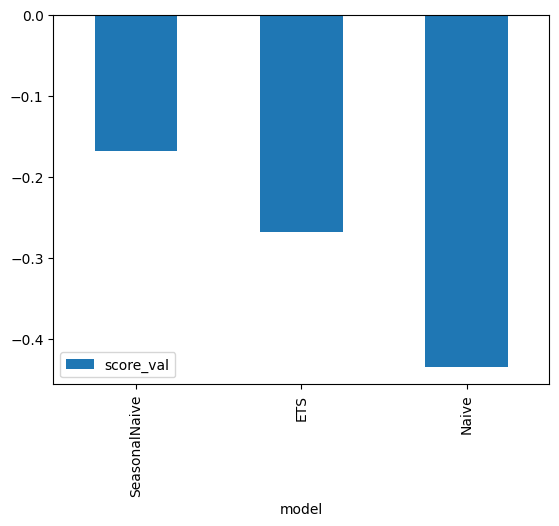

In [ ]:
predictor.leaderboard(silent=True).plot(kind="bar", x="model", y="score_val")

In [ ]:
predictions = predictor.predict(train_data)
predictions.head()

INFO:lightning_fabric.utilities.seed:Global seed set to 123
Model not specified in predict, will default to the model with the best validation score: SeasonalNaive


mean         0.1       0.2         0.3  \
item_id timestamp                                                      
H1      1750-01-30 04:00:00  691.0  613.351903  640.0069  659.227028   
        1750-01-30 05:00:00  618.0  540.351903  567.0069  586.227028   
        1750-01-30 06:00:00  563.0  485.351903  512.0069  531.227028   
        1750-01-30 07:00:00  529.0  451.351903  478.0069  497.227028   
        1750-01-30 08:00:00  504.0  426.351903  453.0069  472.227028   

                                    0.4    0.5         0.6         0.7  \
item_id timestamp                                                        
H1      1750-01-30 04:00:00  675.649919  691.0  706.350081  722.772972   
        1750-01-30 05:00:00  602.649919  618.0  633.350081  649.772972   
        1750-01-30 06:00:00  547.649919  563.0  578.350081  594.772972   
        1750-01-30 07:00:00  513.649919  529.0  544.350081  560.772972   
        1750-01-30 08:00:00  488.649919  504.0  519.350081  535.772972   

                                  0.8         0.9  
item_id timestamp                                  
H1      1750-01-30 04:00:00  741.9931  768.648097  
        1750-01-30 05:00:00  668.9931  695.648097  
        1750-01-30 06:00:00  613.9931  640.648097  
        1750-01-30 07:00:00  579.9931  606.648097  
        1750-01-30 08:00:00  554.9931  581.648097

Loaded data from: https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly_subset/test.csv | Columns = 3 / 3 | Rows = 157660 -> 157660


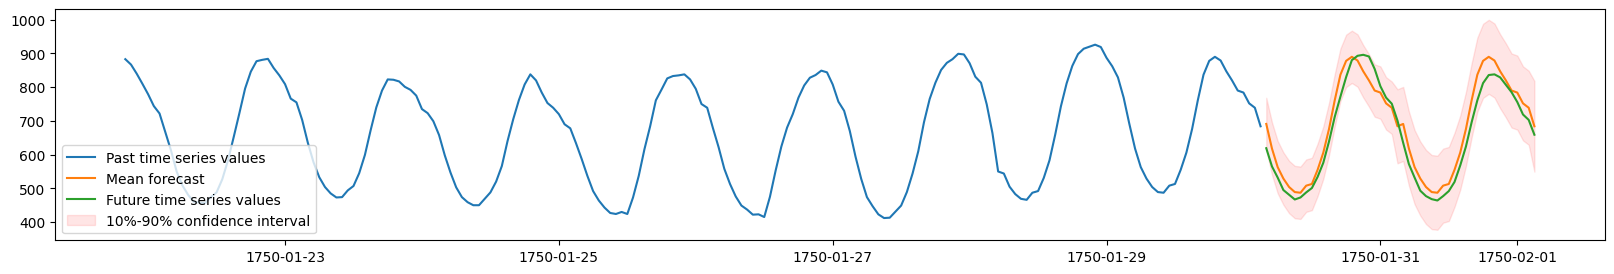

In [ ]:
import matplotlib.pyplot as plt

# TimeSeriesDataFrame can also be loaded directly from a file
test_data = TimeSeriesDataFrame.from_path("https://autogluon.s3.amazonaws.com/datasets/timeseries/m4_hourly_subset/test.csv")

plt.figure(figsize=(20, 3))

item_id = "H1"
y_past = train_data.loc[item_id]["target"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["target"][-48:]

plt.plot(y_past[-200:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend();

In [ ]:
# y_pred

In [ ]:
predictor.leaderboard(test_data, silent=True)


Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).


,model,score_test,score_val,pred_time_test,pred_time_val,fit_time_marginal,fit_order
0,SeasonalNaive,-0.119063,-0.168566,0.825856,1.445555,0.001215,2
1,ETS,-0.215305,-0.268273,238.095559,216.312764,0.001215,3
2,Naive,-0.453291,-0.434068,0.943853,1.546124,0.006287,1
